In [1]:
# history of elimination, comparison of different elimination 
# trajectories/stategies

from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import os
import importlib


from ATARI.sammy_interface import sammy_interface, sammy_classes, sammy_functions, template_creator

from ATARI.ModelData.particle_pair import Particle_Pair

from ATARI.ModelData.experimental_model import Experimental_Model

from copy import copy

from ATARI.AutoFit import chi2_eliminator_v2
from ATARI.AutoFit import elim_addit_funcs

# for animation
from PIL import Image
import imageio
import glob


In [2]:
%matplotlib widget

In [3]:
settings = {
    'path_to_SAMMY_exe': '/home/fire/SAMMY/sammy/build/install/bin/sammy',
    'path_to_SAMMY_temps': './sammy_temps/',
    'keep_runDIR_SAMMY': True,
    'shell_SAMMY': 'bash',
    'running_path': os.getcwd(), #current_dir
    'printout': True
}

savefolder = './data/'
savefolder = './data_new/'

# saving images
anim_save_dir = savefolder+'anim/'

# Ensure the folder exists
if not os.path.exists(anim_save_dir ):
    os.makedirs(anim_save_dir)

all_histories_data = {
    '0_asg_80_red_50_greedy_sdf_15':{
        'dataset_pkl': 'dataset_80_red_50_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl',
        'hist_pkl': 'hist_80_red_50_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl'
    },

    '0_asg_60_red_40_greedy_sdf_15':{
        'dataset_pkl': 'dataset_sf_40_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl',
        'hist_pkl': 'hist_sf_40_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl'
    },

    '0_asg_60_red_15_greedy_sdf_15':{
        'dataset_pkl': 'dataset_sf_15_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl',
        'hist_pkl': 'hist_sf_15_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl'
    },
    

    

    

}

fig_size_data = (9,8)
fig_size_hist = (4,8)

colors = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]


In [4]:
chi2_labels = []
allexp_data = {}

for key, value in all_histories_data.items():

    chi2_allowed = key
    dataset_pkl = value['dataset_pkl']
    hist_pkl = value['hist_pkl']

    energy_range, datasets, covariance_data, experiments, true_chars, Ta_pair, hist, elim_OPTS_used = elim_addit_funcs.load_all(savefolder=savefolder,
                          hist_pkl_name=hist_pkl,
                          dataset_pkl_name=dataset_pkl)
    
    allexp_data[f'{key}'] = {
        'energy_range': energy_range,
        'datasets': datasets,
        'experiments': experiments,
        'covariance_data': covariance_data,
        'true_chars': true_chars,
        'Ta_pair': Ta_pair,
        'hist': hist,
        'elim_opts': elim_OPTS_used
    }

# print(allexp_data['28']['hist'].elimination_history[30]['total_time'])

In [5]:
# model1_key = 0
# model2_key = '0_asg_sf_35'

# model2_key = '0_asg_sf_50'
# model1_key = '0_asg_sf_35'

model1_key = '0_asg_60_red_15_greedy_sdf_15'
model2_key = '0_asg_60_red_40_greedy_sdf_15'
model3_key = '0_asg_60_red_15_greedy_sdf_15'


compare_keys = [f'{model1_key}', f'{model2_key}' ]

comp_level = 12

In [6]:
allexp_data[f'{model1_key}']['Ta_pair'].spin_groups


{'3.0': {'J_ID': 1,
  '<D>': 8.79,
  '<Gn>': 46.5,
  'n_dof': 1,
  '<Gg>': 64.0,
  'g_dof': 1000,
  'D01': 0.9943384234177864,
  'D99': 21.284662911191237,
  'Gn01': 0.007304585392801135,
  'Gn99': 308.52269194748646,
  'Gg01': 57.53039660349525,
  'Gg99': 70.84601563854191,
  'Gt01': 57.53770118888805,
  'Gt99': 379.3687075860284},
 '4.0': {'J_ID': 2,
  '<D>': 4.99,
  '<Gn>': 35.5,
  'n_dof': 1,
  '<Gg>': 64.0,
  'g_dof': 1000,
  'D01': 0.5644765338856377,
  'D99': 12.083102153224605,
  'Gn01': 0.005576618955794415,
  'Gn99': 235.53882933625312,
  'Gg01': 57.53039660349525,
  'Gg99': 70.84601563854191,
  'Gt01': 57.53597322245104,
  'Gt99': 306.38484497479504}}

In [7]:
# make a solution comparison table

print('Elim opts used:')
print(allexp_data[f'{model1_key}']['elim_opts'])


table_1 = elim_addit_funcs.create_solutions_comparison_table_from_hist(hist = allexp_data[f'{model1_key}']['hist'],
                                                Ta_pair = allexp_data[f'{model1_key}']['Ta_pair'],
                     datasets =  allexp_data[f'{model1_key}']['datasets'],
                     experiments =  allexp_data[f'{model1_key}']['experiments'],
                     covariance_data =  allexp_data[f'{model1_key}']['covariance_data'],
                     true_chars = allexp_data[f'{model1_key}']['true_chars'],
                     settings=settings,
                     energy_grid_2_compare_on = allexp_data[f'{model1_key}']['energy_range']
                     )


Elim opts used:
LevMarV0_priorpassed: 0.01
chi2_allowed: 0
deep_fit_max_iter: 30
deep_fit_step_thr: 0.001
greedy_mode: True
interm_fit_max_iter: 10
interm_fit_step_thr: 0.01
start_deep_fit_from: 15
start_fudge_for_deep_stage: 0.05
stop_at_chi2_thr: False

Completed Job: 1
Energy grid for analysis: [202, 227]
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Completed Job: 1
Energy grid for analysis: [202, 227]
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warnin

KeyboardInterrupt: 

In [ ]:
# for step in allexp_data[f'{model1_key}']['hist'].elimination_history:
#     print(step)

In [ ]:
table_1

In [ ]:
fig = elim_addit_funcs.plot_history(allexp_data = allexp_data, 
                                    show_keys = compare_keys, 
                                    settings = settings,
                   fig_size = fig_size_hist, 
                   max_level = comp_level, 
                   title = 'Steps tracking')

fig.show()

In [ ]:
# # times for elimination - for each level and cumulatively

# levels_times = elim_addit_funcs.get_level_times(allexp_data: dict, 
#                  show_keys: list,
#                  settings: dict, 
#                  fig_size: tuple = (6, 10), 
#                  max_level: int = None,
#                  title : str = '')

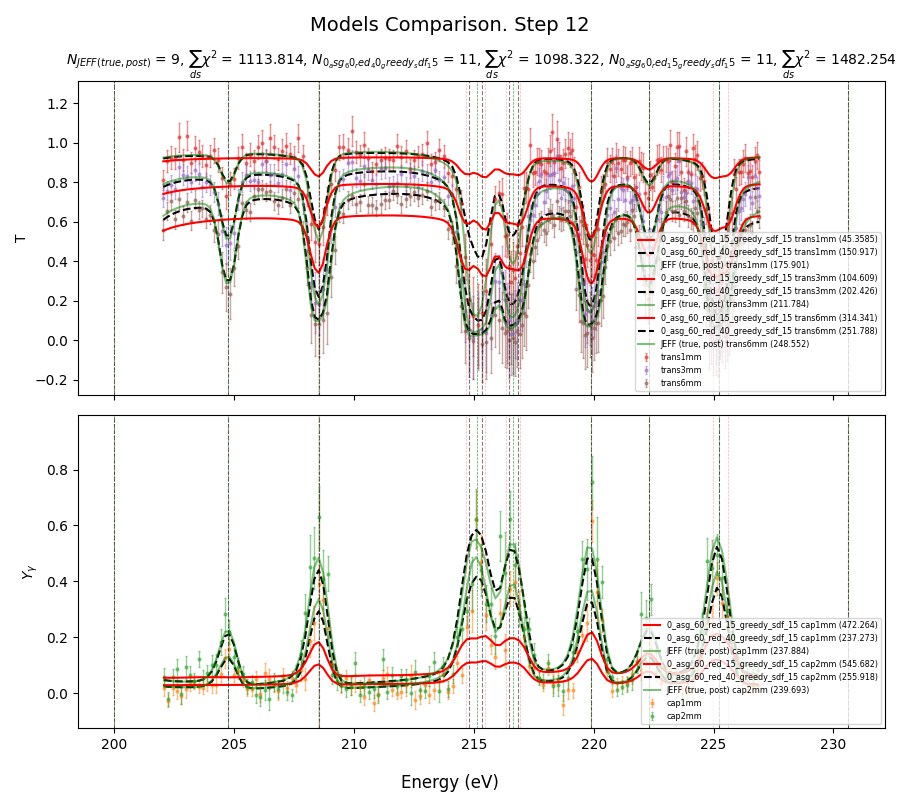

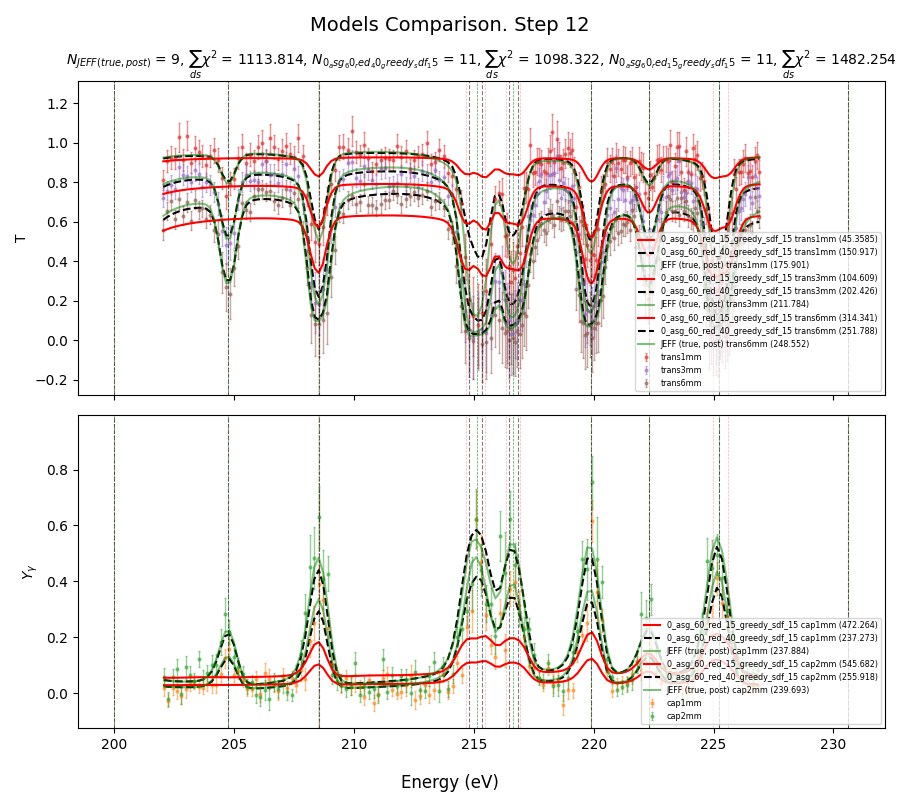

In [8]:
model1 = allexp_data[f'{model1_key}']['hist'].elimination_history[comp_level]['selected_ladder_chars']
model2 = allexp_data[f'{model2_key}']['hist'].elimination_history[comp_level]['selected_ladder_chars']

fig = elim_addit_funcs.plot_datafits(datasets, experiments, 
    fits=model1.pw_post, fits_chi2=model1.chi2_post, f_model_name=f'{model1_key}', f_color='red',
    priors=model2.pw_post, priors_chi2=model2.chi2_post, pr_model_name=f'{model2_key}', pr_color='black',

    true=true_chars.pw_post, true_chi2 = true_chars.chi2_post, t_model_name ='JEFF (true, post)', t_color='green',
        true_pars = true_chars.par_post,
        fit_pars = model1.par_post, 
        prior_pars = model2.par_post,

    title = f'Models Comparison. Step {comp_level}',
    show_spingroups = False,
    fig_size = fig_size_data
    )

fig.show()

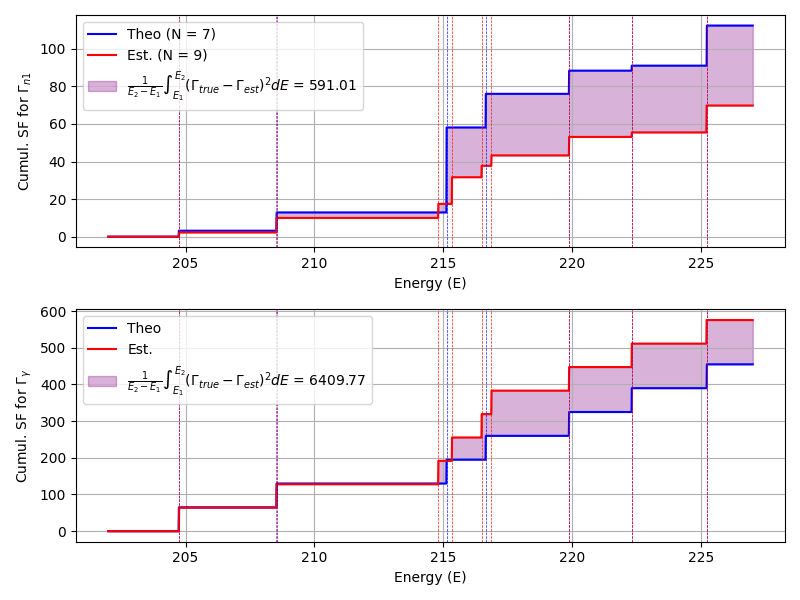

In [9]:
SSE_Gg, SSE_Gn1, SSE_sf_fig = elim_addit_funcs.calc_strength_functions(
        theoretical_df = true_chars.par_post, 
        estimated_df = model2.par_post, 
        energy_range = allexp_data[f'{model1_key}']['energy_range'], 
        fig_size=(8, 6), 
        create_fig=True,
        )

In [ ]:
# check what model in compare models has lower number of resonances

# # printout all models keys.
# for model_key in compare_keys:
#     print(allexp_data[model_key]['hist'].elimination_history.keys())

# Step 1: Find the model with the smallest number of resonances
resonance_counts = {}
for model_key in compare_keys:
    elimination_keys = allexp_data[model_key]['hist'].elimination_history.keys()
    resonance_counts[model_key] = len(elimination_keys)

# Identify the model with the least resonances
model_with_least_resonances = min(resonance_counts, key=resonance_counts.get)
least_resonances_keys = set(allexp_data[model_with_least_resonances]['hist'].elimination_history.keys())

# Step 2: Check that all keys from the model with the least resonances are present in all other models
keys_aligned = all(least_resonances_keys.issubset(set(allexp_data[model_key]['hist'].elimination_history.keys())) for model_key in compare_keys)

# Print results
print(f"Model with the least number of resonances: {model_with_least_resonances}")
print('Keys in history:')
print(allexp_data[model_with_least_resonances]['hist'].elimination_history.keys())
if keys_aligned:
    print("All keys from the model with the least resonances are present in all other models.")
else:
    print("Not all keys from the model with the least resonances are present in other models.")



In [ ]:
# cycle of images creation

out_images = []

for step in allexp_data[model_with_least_resonances]['hist'].elimination_history:
    print(step)

    model1 = allexp_data[f'{model1_key}']['hist'].elimination_history[step]['selected_ladder_chars']
    model2 = allexp_data[f'{model2_key}']['hist'].elimination_history[step]['selected_ladder_chars']

    # paths to save figures
    model_comp_path = anim_save_dir + f'model_comp_{model1_key}_{model2_key}_step_{step}.png'
    chi2_hist_path = anim_save_dir + f'chi2_hist_{model1_key}_{model2_key}_step_{step}.png'
    combined_image_path = anim_save_dir + f'combined_{model1_key}_{model2_key}_step_{step}.png'

    fig = elim_addit_funcs.plot_datafits(datasets, experiments, 
        fits=model1.pw_post, fits_chi2=model1.chi2_post, f_model_name=f'{model1_key}', f_color='red',
        priors=model2.pw_post, priors_chi2=model2.chi2_post, pr_model_name=f'{model2_key}', pr_color='black',

        true=true_chars.pw_post, true_chi2 = true_chars.chi2_post, t_model_name ='JEFF (true, post)', t_color='green',
            true_pars = true_chars.par_post,
            fit_pars = model1.par_post, 
            prior_pars = model2.par_post,

        title = f'Models Comparison. Step {step}',
        show_spingroups = False,
        fig_size = fig_size_data
        )
    
    fig.savefig(fname = model_comp_path)

    # get the plots of history for this step
    fig_hist = elim_addit_funcs.plot_history(allexp_data = allexp_data,
                            show_keys = compare_keys,
                            settings=settings,
                            fig_size = fig_size_hist,
                            max_level = step,
                            title='Steps tracking',
                            folder_to_save=anim_save_dir)
    
    fig_hist.savefig(fname = chi2_hist_path)

    # combine both images into one left+right (left - model_comp_step, right - chi2_hist_step_)
    image1 = Image.open(model_comp_path)
    image2 = Image.open(chi2_hist_path)

    # Determine the total width and max height of the combined image
    total_width = image1.width + image2.width
    max_height = max(image1.height, image2.height)

    # Create a new blank image with the correct size
    combined_image = Image.new('RGB', (total_width, max_height))

    # Paste the two images into the combined image
    combined_image.paste(image1, (0, 0))
    combined_image.paste(image2, (image1.width, 0))

    # Save the combined image
    combined_image.save(combined_image_path)
    out_images.append(combined_image_path)
    print(f'saved {combined_image_path}')

    # delete intermediate images
    # del model_comp_path and chi2_hist_path
    os.remove(model_comp_path)
    os.remove(chi2_hist_path)

In [ ]:
def create_animation(pattern: str,  
                     output_name: str,
                     anim_save_dir: str,
                     out_images: list = [],
                     additional_start_images: list =[], 
                     additional_end_images: list =[], 
                     start_duration: int = 3,
                     intermediate_duration: int = 2,
                     end_duration: int = 2):
    
    """Create an animation based on the specified parameters."""
    print('pattern', pattern)

    # If we don't have any data on out_images, parse the directory
    if len(out_images) == 0:
        path_to_search = os.path.join(anim_save_dir, pattern)

        matched_files = glob.glob(path_to_search)

        #matched_files.sort(key=lambda f: int(os.path.basename(f).split('_')[2]), reverse=True)
        matched_files.sort(key=lambda f: int(os.path.basename(f).split('step_')[-1].split('.png')[0]), reverse=True)

        out_images = matched_files
    
    # Convert durations to milliseconds
    start_duration_ms = start_duration * 1000
    intermediate_duration_ms = intermediate_duration * 1000
    end_duration_ms = end_duration * 1000
    
    # Combine all images in the required order
    all_images = additional_start_images + out_images + additional_end_images
    
    # Print image sizes for verification (optional)
    for img_path in all_images:
        with Image.open(img_path) as img:
            print(f"{os.path.basename(img_path)} - Size: {img.size}")
    
    # Create a list of images from the combined file list
    images = [Image.open(f) for f in all_images]
    
    # Output path for the animated GIF
    output_path = os.path.join(anim_save_dir, output_name)
    
    # Create a list of durations corresponding to each image
    durations = ([start_duration_ms] * len(additional_start_images) + 
                 [intermediate_duration_ms] * len(out_images) + 
                 [end_duration_ms] * len(additional_end_images))
    
    # Save the animated GIF using imageio
    imageio.mimsave(output_path, images, duration=durations) 
    
    print(f"Animated GIF saved to {output_path}")
    return output_path  # Return the output path for further use if needed

#######
#######
#######
# combined plots

pattern = f'combined_{model1_key}_{model2_key}_step_*.png'
output_name = f'output_gif_{compare_keys[0]}_{compare_keys[1]}.gif'

# Attempt to use out_images if already defined

out_images = []  # or some default value or handling

anim_path_name = create_animation(pattern = pattern,  
                     output_name = output_name,
                     anim_save_dir = anim_save_dir,
                     out_images = out_images,
                     additional_start_images =[], 
                     additional_end_images =[], 
                     start_duration = 3,
                     intermediate_duration = 2,
                     end_duration = 2)

# xs for the first model
pattern = f'xs_{model1_key}_step_*.png'
output_name = f'output_xs_{compare_keys[0]}.gif'

out_images = []  # or some default value or handling

anim_path_name = create_animation(pattern = pattern,  
                     output_name = output_name,
                     anim_save_dir = anim_save_dir,
                     out_images = out_images,
                     additional_start_images =[], 
                     additional_end_images =[], 
                     start_duration = 3,
                     intermediate_duration = 2,
                     end_duration = 2)

pattern = f'xs_{compare_keys[1]}_step_*.png'
output_name = f'output_xs_{compare_keys[1]}.gif'
out_images = []  # or some default value or handling

anim_path_name = create_animation(pattern = pattern,  
                     output_name = output_name,
                     anim_save_dir = anim_save_dir,
                     out_images = out_images,
                     additional_start_images =[], 
                     additional_end_images =[], 
                     start_duration = 3,
                     intermediate_duration = 2,
                     end_duration = 2)


In [ ]:
# out_images